# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [377]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Couldn't find program: 'bash'


Начнем с необходимых приготовлений.

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [380]:
coins = pd.read_csv('coins.csv').set_index('date')

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135,41702,68798683,117984,BTC,Bitcoin,135,136,132,134,0,1500520000
2013-04-28,4,9174,44319520,17216,LTC,Litecoin,4,4,4,4,0,73773400
2013-04-29,134,51602,113812845,86925,BTC,Bitcoin,134,147,134,145,0,1491160000
2013-04-29,4,9275,36478097,18395,LTC,Litecoin,4,5,4,4,0,74952700


Посмотрим что получилось

In [7]:
coins.head(5)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.3,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.3,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.3,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.3,4.40,4.18,4.35,0.0,7.377340e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [8]:
#66
coins['symbol'].value_counts().count()

66

### 2. За какой период данные мы имеем? (0.4 балла)

In [9]:
#с 2013-04-28 по  2018-06-06
print("from", coins.index.min(), "to", coins.index.max())


from 2013-04-28 to 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [386]:
print("всего пропуски в", len(coins[coins.isnull().any(axis=1)]), "строчках")

всего пропуски в 1830 строчках


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [387]:
a = coins.loc[coins['price'] == coins['price'].max()]
print(a['name'])
#семнадцатого декабря у биткоена

date
2017-12-17    Bitcoin
Name: name, dtype: object


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

наибольшая капиализация:57439466431000.0
наименьшая капиализация:10935015000.0


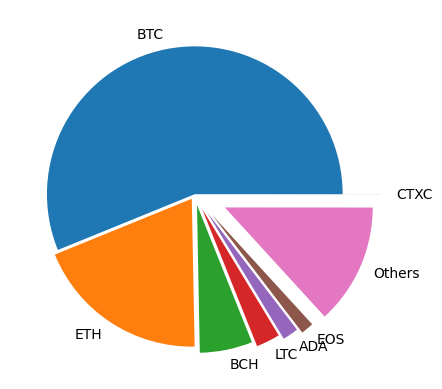

In [376]:
coins_cap = []
coins_names = []

#print((coins['symbol'].value_counts().index))
for i in coins['symbol'].value_counts().index:
    coins_cap.append(coins[coins['symbol'] == i]['market'].sum())
    coins_names.append(i)
data = pd.Series(index=coins_names, data=coins_cap)
NUMBERS_OF_COINS = 6
printing = data.sort_values(ascending=False)[:NUMBERS_OF_COINS]
printing.loc['Others'] = data.sort_values(ascending=False)[NUMBERS_OF_COINS:].sum()
printing.loc[data.sort_values(ascending=False).index[-1]] = data.sort_values(ascending=False)[-1]
print("наибольшая капиализация:" + str(printing[0]) + "\n","наименьшая капиализация:" +str(printing[-1]), sep="")
summary = printing.values.sum()
plt.pie(
    printing.values,
    labels=printing.index,
    explode=[i/27 for i in range(printing.size)]
)

plt.show()



## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [109]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    a = coins[
        coins['symbol'] == symbol
        ][start_date:end_date]
    fig = plt.figure(
        figsize=(16, 9),  
        facecolor='white', 
        dpi=100  
    )
    ax = fig.add_subplot(111)
    
    
    ax.plot(
        a.index, a.low,
        color = 'grey',
        label='low, high'
    )
    ax.plot(
        a.index, a.high,
        color = 'grey'
    )
    ax.fill_between(
        a.index, a.low, a.high,
        color='lightgrey',
        alpha=0.5
    )
    ax.scatter(
        a.index, a.open,
        marker='^',
        s=22 / (a.shape[0] // 30),
        color = 'blue',
        label='open'
    )
    ax.scatter(
        a.index, a.close,
        marker='v',
        s=22 / (a.shape[0] // 30),
        color = 'red',
        label='close'
    )
    ax.set_xticks(a.index.values[::a.shape[0]//9])
    ax.plot(
        a.index, a.price,
        color='black',  
        linestyle='--',
        linewidth=0.6,
        label='price'
    )
    plt.xlabel(
        'даты',
        fontdict=dict(family='monospace', color='peru', weight='light', size=25)  # Настройки шрифта
    )
    plt.ylabel(
        'цена',
        fontdict=dict(family='monospace', color='peru', weight='light', size=25)
    )
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

Посмотрим, что получилось:

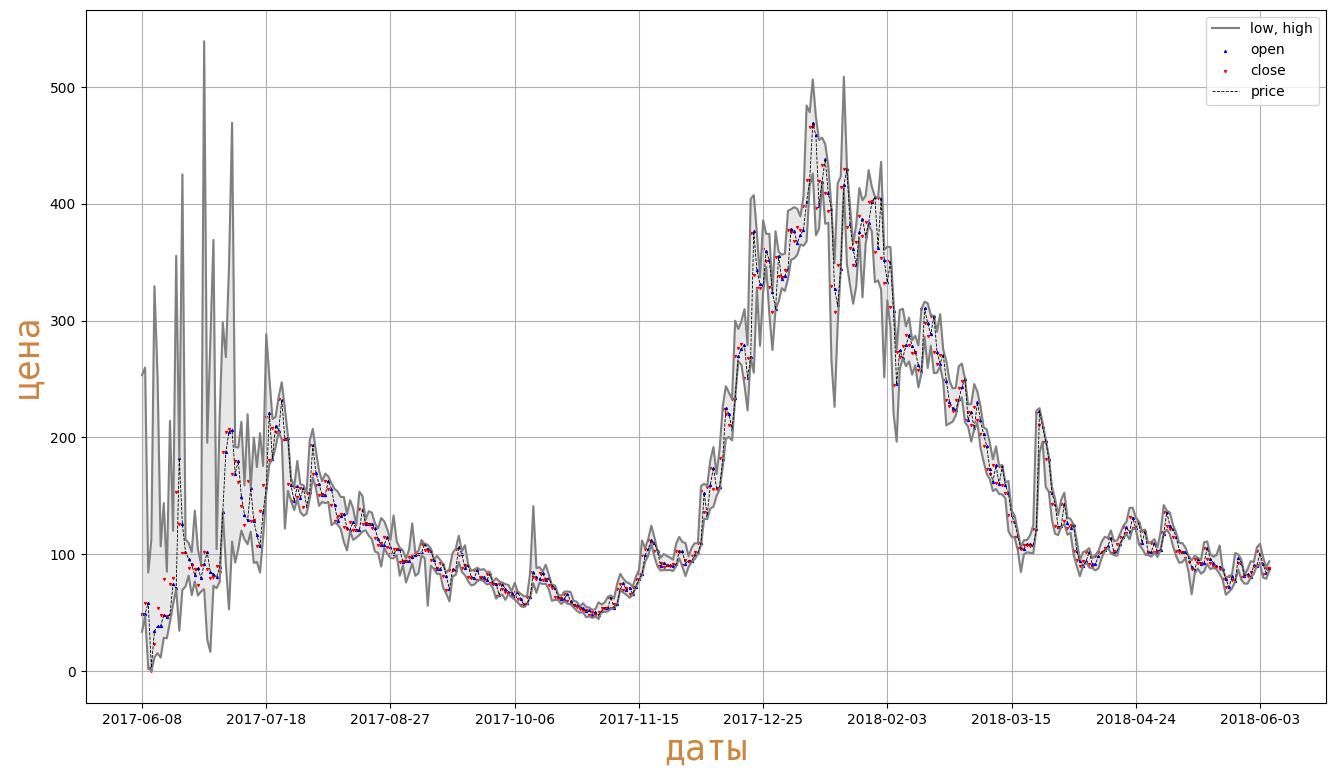

In [285]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2017-04-02', end_date='2018-06-06') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [129]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    a = coins[coins['symbol'] == symbol][start_date:end_date]
    a['pnd'] = a['high'] / a['close']
    mx = a['pnd'].max()
    return(a[a['pnd'] == mx].index[0], mx)

In [131]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-09-14', 1.2426821344236834)

Сравните эти значения для разных монет:

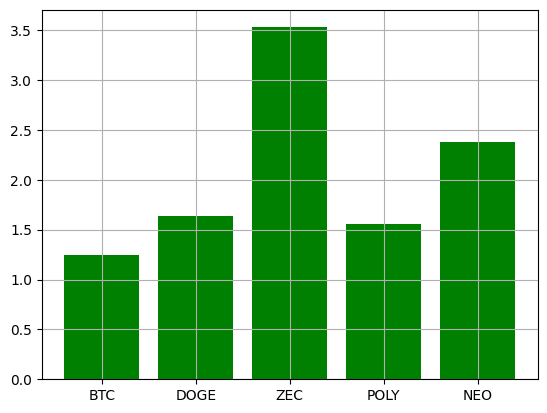

In [138]:
coins_to_look =  ('BTC', 'DOGE', 'ZEC', 'POLY', 'NEO')
data=list(find_most_severe_pump_and_dump(coins, symbol=x, start_date='2015-06-01', end_date='2018-06-01')[1] for x in coins_to_look)
#print(label)
plt.bar(
    coins_to_look,
    data,
    color='green'
)  
plt.grid()
plt.show()

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле. 

(*сумма в конце / сумму в начале - 1*)

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [154]:
coins[coins['symbol'] == 'BTC']['price']['2013-04-28']

135.3

In [158]:
def compute_roi(coins, investments, start_date, end_date):
    ans = 0
    for i in investments.keys():
        old = coins[coins['symbol'] == i]['price'][start_date]
        new = coins[coins['symbol'] == i]['price'][end_date]
        ans += investments[i] * new / old
    return ans / sum(investments.values()) - 1


In [279]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.03556913306527565

In [282]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [251]:
def plot_bollinger_bands(coins, symbol, window, width):
    start_date = coins.index[0]
    end_date = coins.index[-1]
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=window).mean()
    std = price.rolling(window=window).std()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean - std * width, color = 'grey', label = 'Bolinger bounds')
    ax.plot(leading_mean + std * width, color = 'grey')
    ax.fill_between(
        coin.index, leading_mean - std * width, leading_mean + std * width,
        alpha=0.5,
        color='lightgrey',
    )
    ax.plot(leading_mean, color='green', label='MA{}'.format(window))
    ax.plot(coin.index, price, color='blue', linewidth=0.8,label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.set_xticks(coin.index.values[::coin.shape[0]//9])
    ax.grid(True)
    plt.show() 


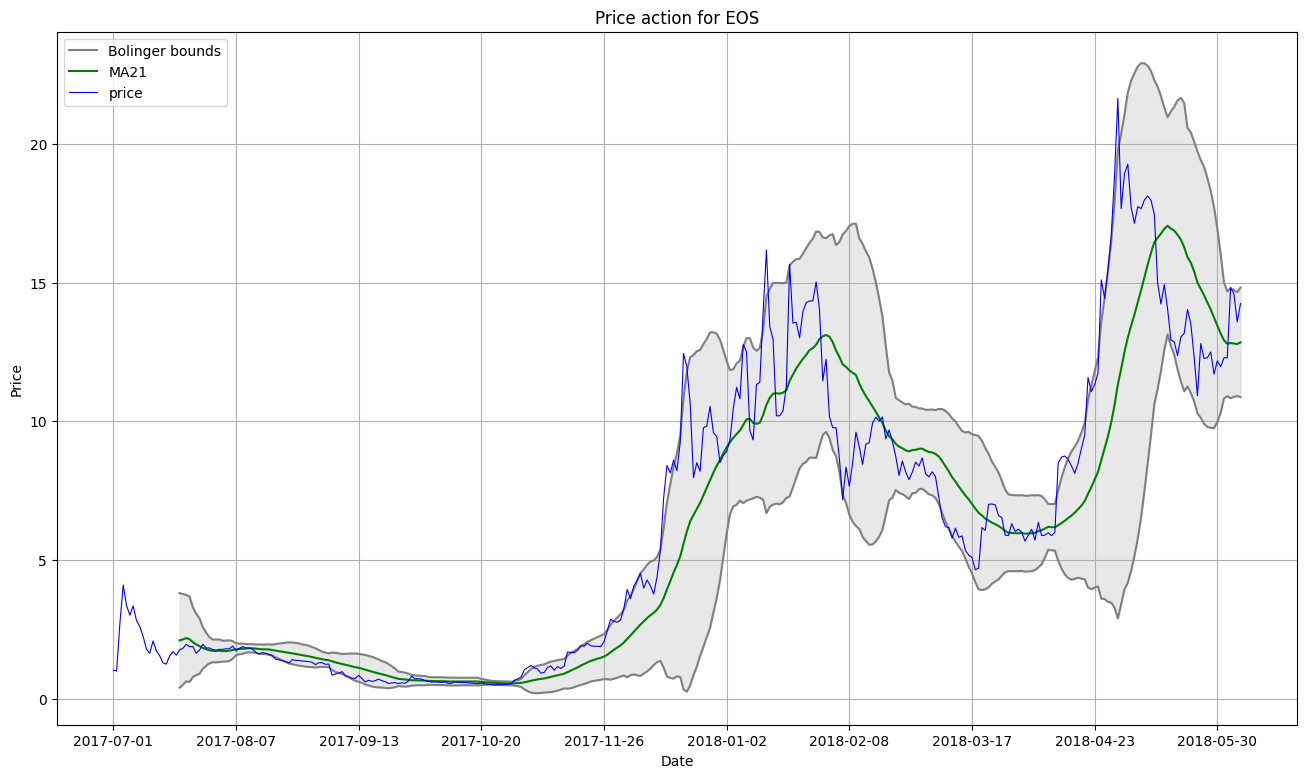

In [252]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

In [278]:

window_slider = ipywidgets.IntSlider(
    value=21, 
    min=2, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=True)

width_slider = ipywidgets.IntSlider(
    value=2, 
    min=1, 
    max=10, 
    step=1,
    layout={'width': '700px'},
    continuous_update=True)


symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA', 'DOGE'),
    index=0,
    value='BCH',
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_bollinger_bands,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    window=window_slider,
    width=width_slider
)

interactive(children=(Dropdown(description='symbol', index=3, layout=Layout(width='700px'), options=('BTC', 'E…

<function __main__.plot_bollinger_bands(coins, symbol, window, width, **kwargs)>

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**

довольно хорошо выполняется, но сильно зависит от K и N (при больших K неприменимо на практике, при больших N даёт большое расхождение с практикой)

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [409]:
np.random.randint(0,5)

2

In [418]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.set_title('Capitalizations')
    colors = ('blue', 'black', 'grey','red', 'green')
    for i in symbols:
        ax.plot(coins[coins['symbol'] == i][start_date:].index, coins[coins['symbol'] == i][start_date:]['market'], color=colors[np.random.randint(0, len(colors))], linewidth=0.8,label=i)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.set_xticks(coins[coins['symbol']== 'BTC'][start_date:].index.values[::coins[coins['symbol'] == 'BTC'][start_date:].shape[0]//9])
    ax.grid(True)
    plt.show() 


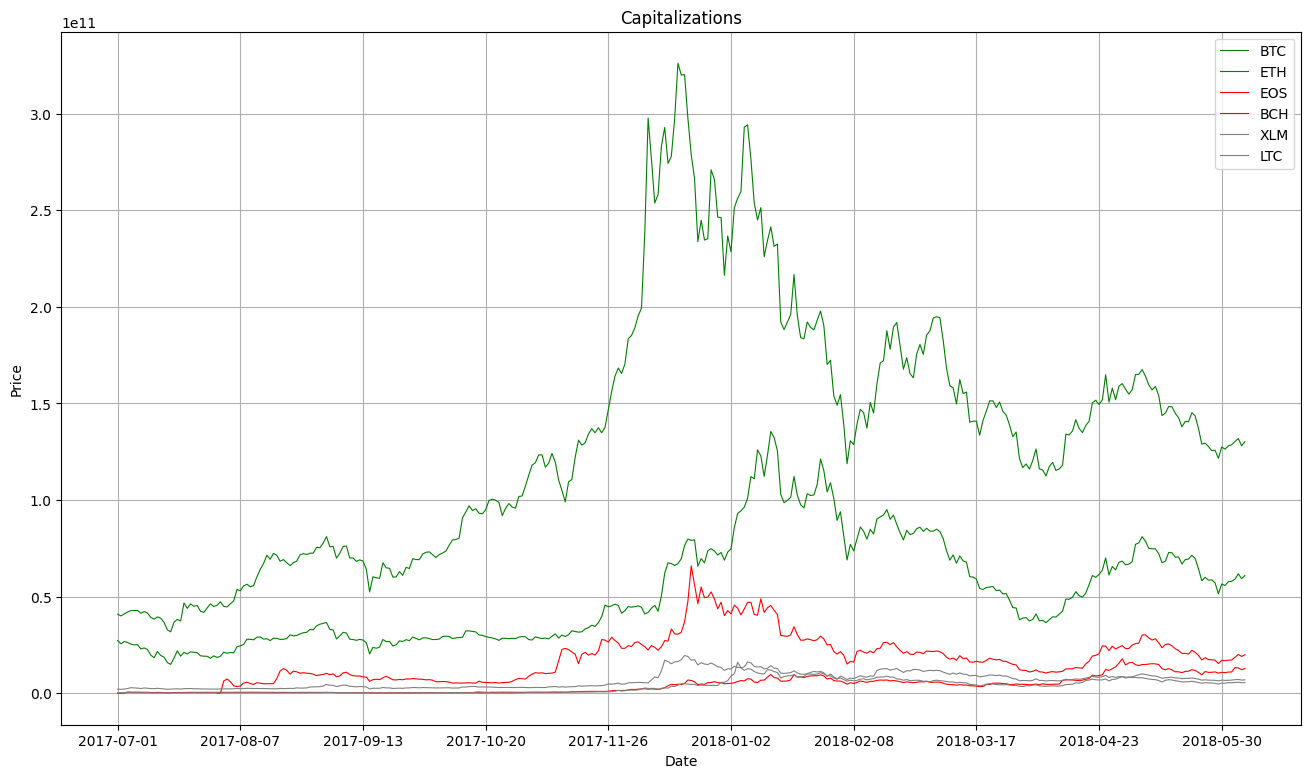

In [419]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

зависимость вида y = 1 - x, потому что суммарная доля капитализации равна 1

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

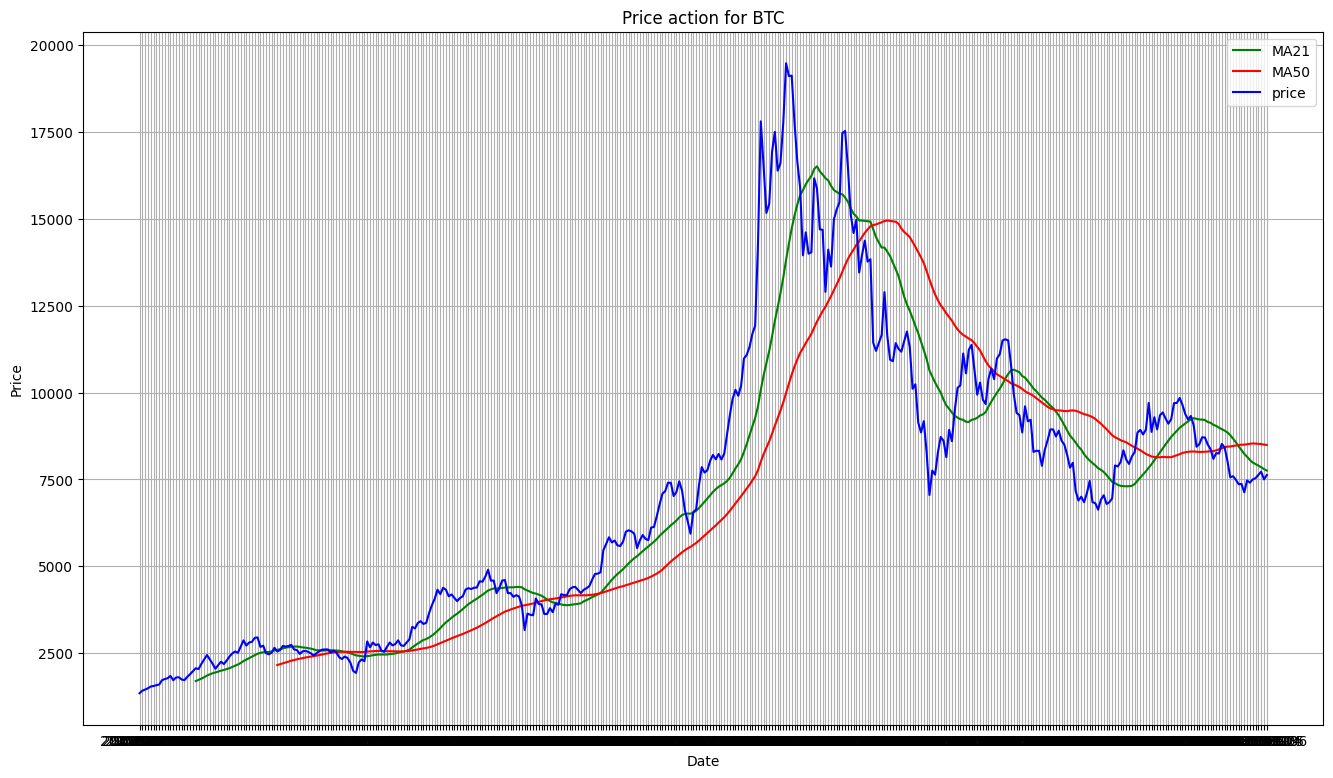

In [139]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)
ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ♂semen♂

Все примеры разобранных здесь ♂fisting♂ являются игрушечными и не подходят для реальной ♂gym♂. Без серьезной ♂anal♂ вас там ♂fuck♂ с потрохами.